#  차원 축소
## 주성분 분석(Principal Component Analysis)

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
width=800; height=500

# <font color='red'> 실습 1

- 미국 패션의류 온라인 업체(Zalando)의 구두와 의류 품목의 흑백 이미지 사진을 학습하여 10 개 유형으로 분류 예측하여 보자. 10개 범주 유형은 다음 그림과 같이 "T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"이다.
- 데이터는 https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_test.csv 압축파일을 ‘data’ 폴더로 내려받는다.

import zipfile
zpf = zipfile.ZipFile('../data/fashion-mnist_test.csv.Zip')
zpf.filelist

df = pd.read_csv(zpf.open('fashion-mnist_test.csv'))

In [2]:
df = pd.read_csv('../data/fashion-mnist_test.csv')

총 70,000개의 이미지 사진이 있고 각 사진은 784개 픽셀(28*28) 로 나누어진다. 각 픽셀은 명암농도 0부터 255까지 값을 갖는다. 훈련데이터(train) 는 60,000개, 검증데이터(test)는 10,000개이다.

In [3]:
df.head()
df.shape

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)

무작위 층화 샘플링으로 실습을 위해 sampling

In [4]:
df = df.sample(frac=0.1)

In [5]:
X = df.drop(['label'], axis=1)
X = X/255
y = df['label']

<Figure size 432x288 with 0 Axes>

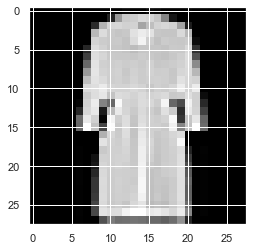

In [6]:
example_index = 225
plt.figure()
_ = plt.imshow(np.reshape(X.values[example_index, :],(28,28)), 'gray')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV

In [9]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=3)
param_grid = {}
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
y_predict = gs.fit(X_train, y_train).predict(X_test)
y_probas = gs.fit(X_train, y_train).predict_proba(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        23
           1       1.00      0.86      0.93        22
           2       0.64      0.67      0.65        24
           3       0.78      0.83      0.81        30
           4       0.63      0.79      0.70        28
           5       0.79      0.79      0.79        24
           6       0.79      0.46      0.58        24
           7       0.86      0.78      0.82        23
           8       0.89      0.84      0.86        19
           9       0.86      0.91      0.88        33

    accuracy                           0.79       250
   macro avg       0.80      0.79      0.79       250
weighted avg       0.80      0.79      0.79       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

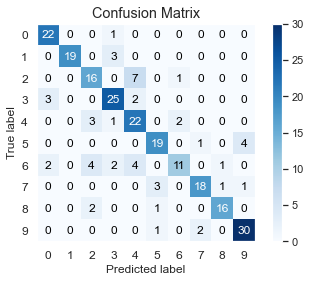

In [11]:
# 시각화 툴
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

### PCA를 활용하여 예측

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(X)
X.shape
X_reduced.shape

(1000, 784)

(1000, 70)

### Pipeline으로 예측 (randomforest classifier)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y)

In [14]:
gs = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), param_distributions={})

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.96      0.88      0.92        25
           2       0.69      0.64      0.67        28
           3       0.68      0.86      0.76        22
           4       0.70      0.88      0.78        24
           5       1.00      0.90      0.95        21
           6       0.58      0.52      0.55        21
           7       0.88      0.91      0.89        23
           8       0.96      0.81      0.88        32
           9       0.88      0.96      0.92        24

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

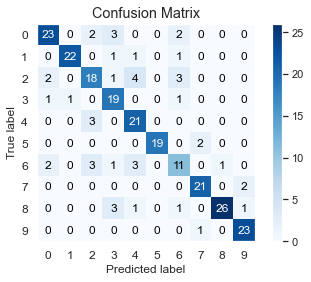

In [16]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('../data/fashion-mnist_test.csv')
df = df.sample(frac=0.1)
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2816,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6514,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,1,0,0


In [18]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
                    PCA(n_components=0.9),
                    SGDClassifier(max_iter=1000, loss= 'log', tol=1e-3)) # default 'hinge'는 predic_prba() 에러

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [21]:
gs = RandomizedSearchCV(clf, param_grid, cv = kf) 
gs.fit(X_train, y_train)
y_predict = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('pca', PCA(n_components=0.9)),
                                             ('sgdclassifier',
                                              SGDClassifier(loss='log'))]),
                   param_distributions={})

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        22
           1       1.00      0.83      0.90        23
           2       0.81      0.72      0.76        29
           3       0.50      0.76      0.60        17
           4       0.71      0.50      0.59        30
           5       0.91      0.88      0.89        24
           6       0.33      0.48      0.39        23
           7       0.74      0.95      0.83        21
           8       0.95      0.81      0.88        26
           9       0.94      0.83      0.88        35

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.77      0.74      0.75       250



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

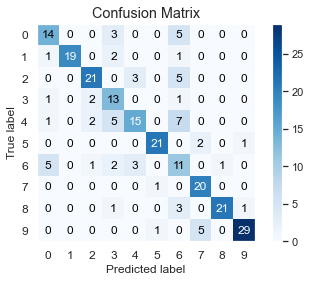

In [23]:
skplt.metrics.plot_confusion_matrix(y_test, y_predict)

# <font color='red'> 실습 2

https://www.kaggle.com/titan23/us-college-dataset/data 자료로 다운로드

In [24]:
df= pd.read_csv("../data/College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [25]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [26]:
df.rename(columns = {'Unnamed: 0': 'Name'}, inplace=True)

In [27]:
df.set_index('Name', inplace = True)

In [28]:
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [30]:
X = df.drop('Private', axis=1)
y = df['Private']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [31]:
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=.80)),
         ('clf', LogisticRegression())]

pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(classification_report(y_train, train_predictions))

print("TEST:")
print(classification_report(y_test, test_predictions))

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.8)),
                ('clf', LogisticRegression())])

TRAIN:
              precision    recall  f1-score   support

          No       0.91      0.82      0.87       177
         Yes       0.94      0.97      0.95       483

    accuracy                           0.93       660
   macro avg       0.93      0.90      0.91       660
weighted avg       0.93      0.93      0.93       660

TEST:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86        35
         Yes       0.94      0.94      0.94        82

    accuracy                           0.91       117
   macro avg       0.90      0.90      0.90       117
weighted avg       0.91      0.91      0.91       117



# End